# Introduction to Matplotlib

---

## Using the matplotlib.pyplot Interface

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Creating a blank plot

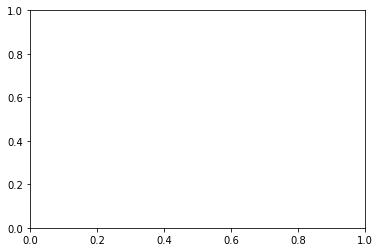

In [3]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()
plt.show()

---

## Adding Data to an axes object

In [22]:
# Loading Datasets
weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/seattle_weather.csv", index_col= "DATE")
austin_weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/austin_weather.csv", index_col = "DATE")

In [23]:
# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

C:\Users\ishti\AppData\Local\Temp\ipykernel_13888\128449606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather["MONTH"] = month


**Datasets**

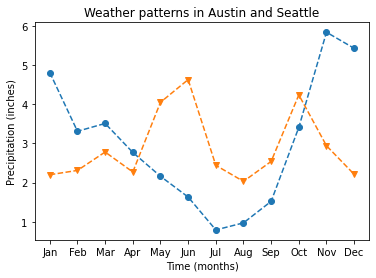

In [47]:
fig, ax = plt.subplots()
# Plotting MLY-PRCP-NORMAL from seattle_weather against the MONTH

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--')
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker = 'v', linestyle = '--')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

C:\Users\ishti\AppData\Local\Temp\ipykernel_2152\1576003910.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(seattle_weather["MONTH"], rotation = 60)
C:\Users\ishti\AppData\Local\Temp\ipykernel_2152\1576003910.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(seattle_weather["MONTH"], rotation = 60)


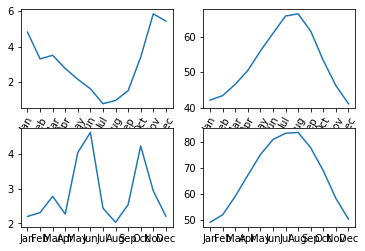

In [50]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax[0, 0].set_xticklabels(seattle_weather["MONTH"], rotation = 60)

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax[0, 1].set_xticklabels(seattle_weather["MONTH"], rotation = 60)

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

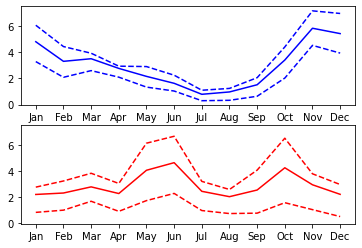

In [51]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

plt.show()

---

In [28]:
# Read the data from file using read_csv
climate_change = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/climate_change.csv",parse_dates = ["date"] , index_col = "date")

In [4]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


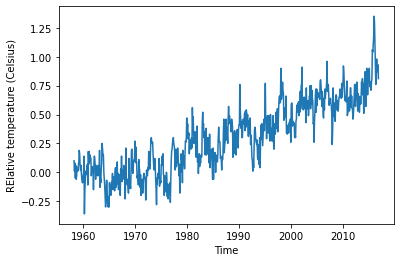

In [6]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot

ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("RElative temperature (Celsius)")

# Show the figure
plt.show()

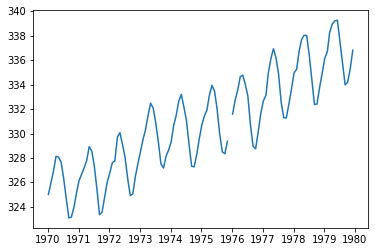

In [11]:
fig, ax = plt.subplots()
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

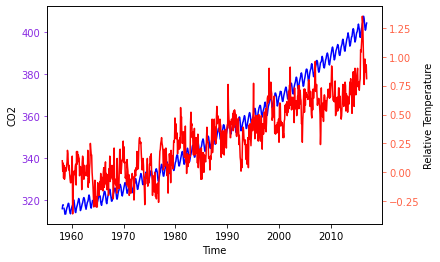

In [17]:
# Initalize a Figure and Axes

fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color= "blue")

ax.tick_params('y', colors = 'blueviolet')

ax.set_xlabel("Time")

ax.set_ylabel("CO2")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color="red")

ax2.set_ylabel("Relative Temperature")
ax2.tick_params('y', colors = 'tomato')

plt.show()

In [19]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color= color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors= color)

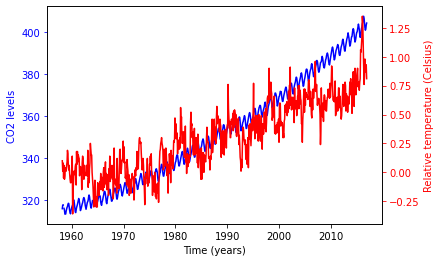

In [20]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temperature (Celsius)")

plt.show()

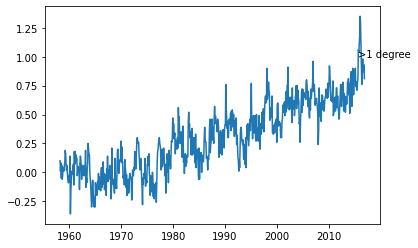

In [21]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(
    climate_change.index, climate_change["relative_temp"]
)

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

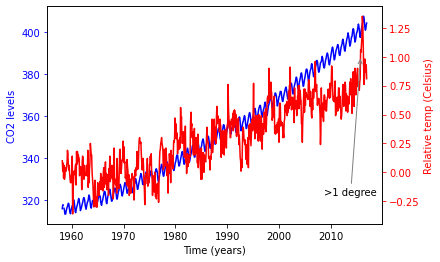

In [22]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

---

### Quantative Comparisons

**Loading Dataset**

In [23]:
medals = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/medals_by_country_2016.csv", index_col = 0)

In [24]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, United States to Japan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Bronze  10 non-null     int64
 1   Gold    10 non-null     int64
 2   Silver  10 non-null     int64
dtypes: int64(3)
memory usage: 320.0+ bytes


In [25]:
medals.shape

(10, 3)

In [26]:
medals.isna().sum()

Bronze    0
Gold      0
Silver    0
dtype: int64

In [27]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


In [28]:
medals.tail()

,Bronze,Gold,Silver
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


C:\Users\ishti\AppData\Local\Temp\ipykernel_2152\2696064357.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 40)


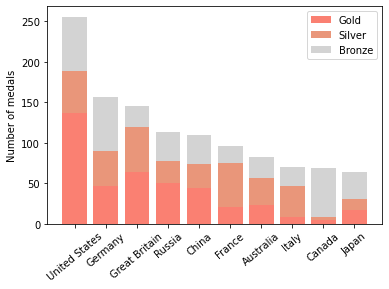

In [55]:
# Show bars of the index(rows)

fig, ax = plt.subplots()
ax.bar(
    medals.index,
    medals["Gold"],
    label = "Gold",
    color = "salmon"
)
ax.bar(
    medals.index,
    medals["Silver"],
    bottom = medals["Gold"],
    label = "Silver",
    color = "darksalmon"
)

ax.bar(
    medals.index, medals["Bronze"],
    bottom = medals["Gold"] + medals["Silver"],
    label = "Bronze",
    color = "lightgray"
)

ax.set_xticklabels(medals.index, rotation = 40)
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

---

### Histogram

In [2]:
summer = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/summer2016.csv", index_col = 0)

In [12]:
mens_rowing = summer.loc[:,["Height", "Weight", "Age", "Sex", "Sport"]].query('Sex == "M" and Sport == "Rowing"')

In [13]:
mens_rowing.head()

,Height,Weight,Age,Sex,Sport
158,198.0,90.0,21.0,M,Rowing
11648,178.0,71.0,27.0,M,Rowing
14871,183.0,70.0,28.0,M,Rowing
15215,188.0,73.0,27.0,M,Rowing
18441,187.0,90.0,26.0,M,Rowing


In [16]:
mens_gymnastics = summer.loc[:,["Height", "Weight", "Age", "Sex", "Sport"]].query('Sex == "M" and Sport == "Gymnastics"')

In [17]:
mens_gymnastics.head()

,Height,Weight,Age,Sex,Sport
794,161.0,62.0,24.0,M,Gymnastics
796,161.0,62.0,24.0,M,Gymnastics
797,161.0,62.0,24.0,M,Gymnastics
18577,165.0,55.0,24.0,M,Gymnastics
18579,165.0,55.0,24.0,M,Gymnastics


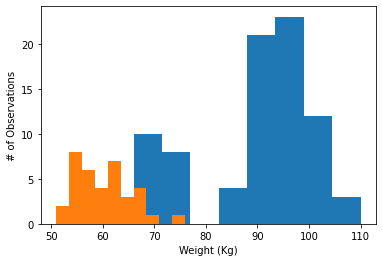

In [18]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (Kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of Observations")

plt.show()

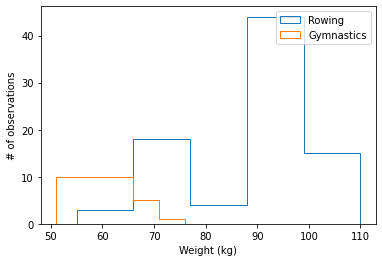

In [19]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing

ax.hist(mens_rowing["Weight"], label = "Rowing", histtype = "step", bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label = "Gymnastics", histtype = 'step', bins = 5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Errorbars

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


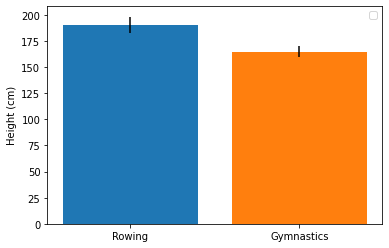

In [20]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr= mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr= mens_gymnastics["Height"].std())

# Label the y-axis
ax.legend()
ax.set_ylabel("Height (cm)")

plt.show()

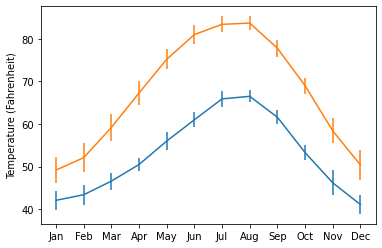

In [24]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr = seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr = austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Box and Whiskerplot

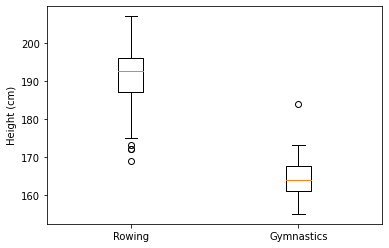

In [25]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames

ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Scatter plot

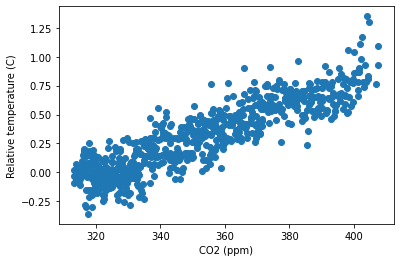

In [29]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(
    climate_change["co2"], climate_change["relative_temp"]
)

# Set the x-axis label to "CO2 (ppm)"

ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"

ax.set_ylabel("Relative temperature (C)")

plt.show()

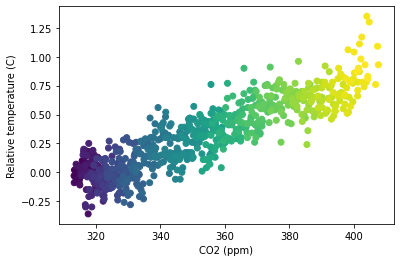

In [30]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color

ax.scatter(
    climate_change["co2"], climate_change["relative_temp"], c = climate_change.index
)

# Set the x-axis label to "CO2 (ppm)"

ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()